In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Forecasting Resources (ST Academy)/Data + Code/daily-total-female-births-CA.csv", header=0)
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
data["date"].dtype

dtype('O')

In [6]:
temp = pd.read_csv("/content/drive/MyDrive/Forecasting Resources (ST Academy)/Data + Code/daily-total-female-births-CA.csv", header=0, parse_dates=[0])
temp.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
temp["date"].dtype

dtype('<M8[ns]')

In [8]:
features = temp.copy() 

In [9]:
features["year"] = temp["date"].dt.year
features["month"] = temp["date"].dt.month
features["day"] = temp["date"].dt.day
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [10]:
features["lag2"] = temp["births"].shift(2)
features.head()

,date,births,year,month,day,lag2
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,NaN
2,1959-01-03,30,1959,1,3,35.0
3,1959-01-04,31,1959,1,4,32.0
4,1959-01-05,44,1959,1,5,30.0


In [12]:
features["mean"] = temp["births"].rolling(window=3).mean()
features["max"] = temp["births"].rolling(window=3).max()
features.head()

,date,births,year,month,day,lag2,mean,max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,NaN,NaN
2,1959-01-03,30,1959,1,3,35.0,32.333333,35.0
3,1959-01-04,31,1959,1,4,32.0,31.000000,32.0
4,1959-01-05,44,1959,1,5,30.0,35.000000,44.0


In [13]:
features["expand_max"] = temp["births"].expanding().max()
features["expand_mean"] = temp["births"].expanding().mean()
features.head()

,date,births,year,month,day,lag2,mean,max,expand_max,expand_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,35.0,35.000000
1,1959-01-02,32,1959,1,2,NaN,NaN,NaN,35.0,33.500000
2,1959-01-03,30,1959,1,3,35.0,32.333333,35.0,35.0,32.333333
3,1959-01-04,31,1959,1,4,32.0,31.000000,32.0,35.0,32.000000
4,1959-01-05,44,1959,1,5,30.0,35.000000,44.0,44.0,34.400000


In [14]:
ndata = pd.read_csv("/content/drive/MyDrive/Forecasting Resources (ST Academy)/Data + Code/daily-min-temperatures.csv")
ndata.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [15]:
ndata["t"] = ndata["Temp"].shift(1)
ndata.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [18]:
train, test = ndata[1:ndata.shape[0]-7], ndata[ndata.shape[0]-7:]

In [19]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [20]:
train_x, train_y = train["t"], train["Temp"]
test_x, test_y = test["t"], test["Temp"]

In [21]:
prediction = test_x.copy()
print(prediction)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

3.4228571428571413

In [25]:
import matplotlib.pyplot as plt

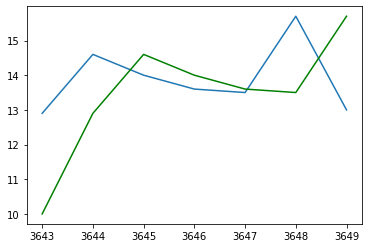

In [27]:
plt.plot(test_y)
plt.plot(prediction, color="green")